In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
file=pd.read_csv("fcc-forum-pageviews.csv")
df=pd.DataFrame(file)
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [ ]:
df=df[(df["value"]>df["value"].quantile(0.025)) & (df["value"]<df["value"].quantile(0.975))]
df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

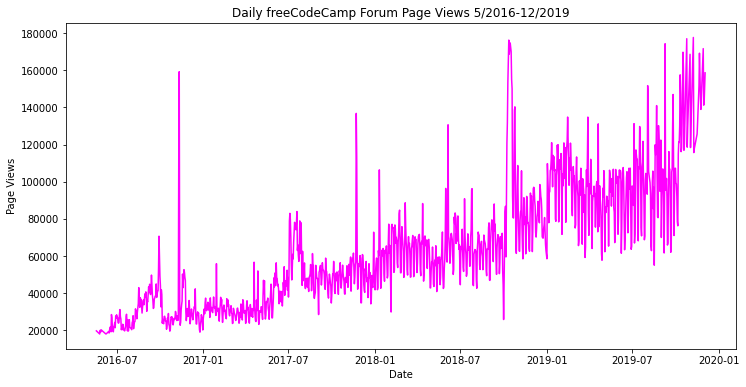

In [ ]:
df["date"]  = pd.to_datetime(df["date"])
fig,axes=plt.subplots(figsize=(12,6))
axes.plot(df["date"],df["value"],color="fuchsia")
axes.set_ylabel("Page Views")
axes.set_xlabel("Date")
axes.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")


In [ ]:
df_bar=df.copy()
df_bar.index=df_bar["date"]
average=df_bar["value"].resample("M").mean()
df_bar=average.to_frame()
df_bar=df_bar.reset_index()
df_bar["year"]=[d.year for d in df_bar.date]
df_bar["month"]=[d.strftime('%B') for d in df_bar.date]
labels=["January","February","March","April","May","June","July","August", "September", "October","November","December"]
df_bar

,date,value,year,month
0,2016-05-31,19432.400000,2016,May
1,2016-06-30,21875.105263,2016,June
2,2016-07-31,24109.678571,2016,July
3,2016-08-31,31049.193548,2016,August
4,2016-09-30,41476.866667,2016,September
5,2016-10-31,27398.322581,2016,October
6,2016-11-30,40448.633333,2016,November
7,2016-12-31,27832.419355,2016,December
8,2017-01-31,32785.161290,2017,January
9,2017-02-28,31113.071429,2017,February


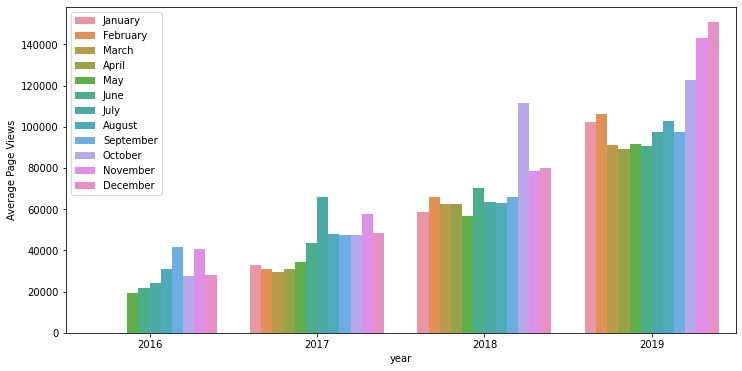

In [ ]:
fig,axes=plt.subplots(figsize=(12,6))
sns.barplot(data=df_bar,hue="month",x="year",y="value",ax=axes,hue_order=labels)
axes.set_ylabel("Average Page Views")
plt.legend(loc="upper left")

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_box['month'] = pd.Categorical(df_box['month'], categories=months, ordered=True)
df_box=df_box.sort_values(by=["month"])

df_box

,index,date,value,year,month
210,242,2017-01-06,37353,2017,Jan
937,972,2019-01-06,94108,2019,Jan
936,971,2019-01-05,77897,2019,Jan
935,970,2019-01-04,94514,2019,Jan
934,969,2019-01-03,100710,2019,Jan
...,...,...,...,...,...
567,599,2017-12-29,72819,2017,Dec
566,598,2017-12-28,51018,2017,Dec
565,597,2017-12-27,43075,2017,Dec
201,233,2016-12-28,28424,2016,Dec


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

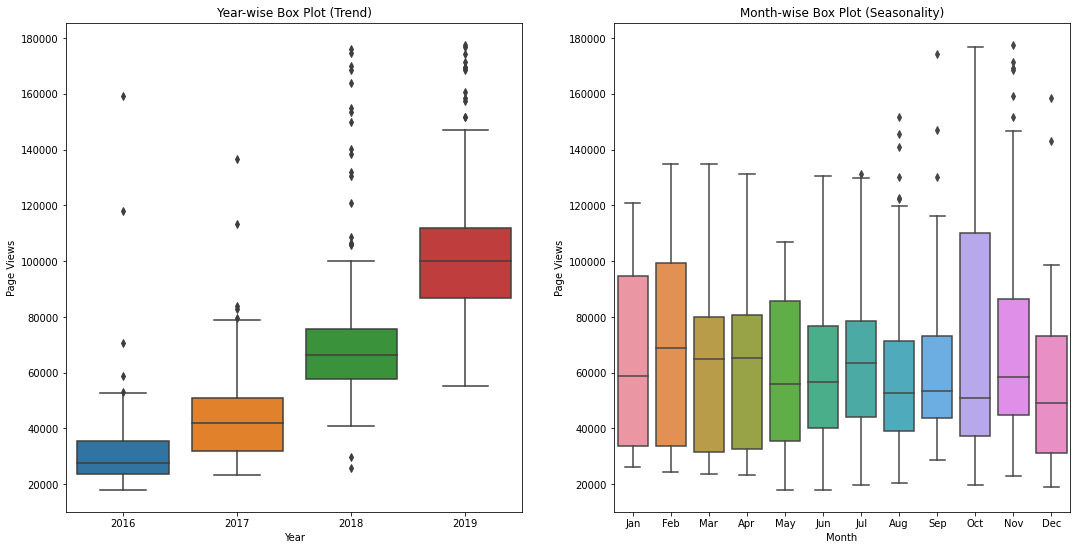

In [ ]:
fig,axes=plt.subplots(1,2, figsize=(18,9))
ax1=sns.boxplot(data=df_box, x="year",y="value",ax=axes[0])
ax1.set_ylabel("Page Views")
ax1.set_xlabel("Year")
ax1.set_title("Year-wise Box Plot (Trend)")
ax2=sns.boxplot(data=df_box, x="month",y="value",ax=axes[1])
ax2.set_ylabel("Page Views")
ax2.set_xlabel("Month")
ax2.set_title("Month-wise Box Plot (Seasonality)")